Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\Arnav Dham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:15:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5407
           1       1.00      1.00      1.00      8661

    accuracy                           1.00     14068
   macro avg       1.00      1.00      1.00     14068
weighted avg       1.00      1.00      1.00     14068

Confusion Matrix:
[[5407    0]
 [   3 8658]]
ROC-AUC Score: 0.9999987614783993


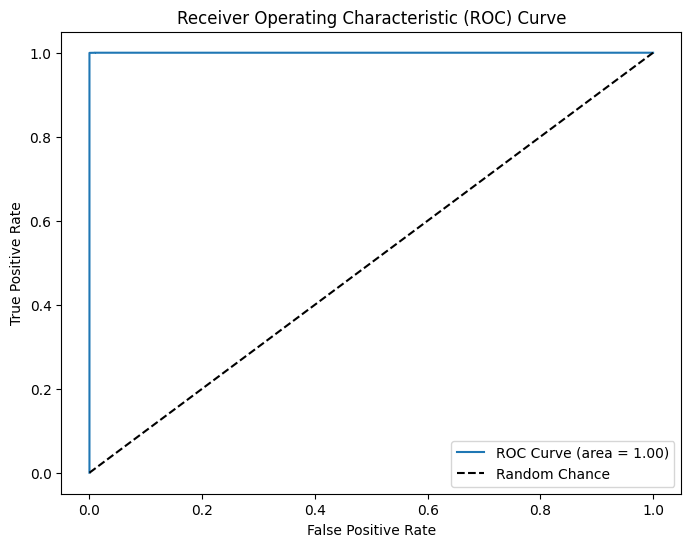

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv(r"C:\Users\Arnav Dham\OneDrive\Desktop\SOP\Dataset\Syn-training.csv")  

# Separate features and target
X = df.drop("Label", axis=1)
y = df["Label"]

# Encode the target labels from strings to integers (e.g., 'Benign' -> 0, 'Syn' -> 1)
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and validation sets (stratify ensures class balance in splits)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
#80 train 20 test

# Define the parameter grid for tuning
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
}

# Initialize the XGBClassifier.
# Note: 'use_label_encoder=False' and 'eval_metric' are set to avoid warnings.
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Set up GridSearchCV to search for the best parameters using ROC-AUC as the scoring metric.
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=2,
)

# Fit the grid search on the training data.
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the validation set
y_pred = best_model.predict(X_val)
y_pred_proba = best_model.predict_proba(X_val)[:, 1]

# Evaluate the model with a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Compute and display the ROC-AUC score
roc_auc = roc_auc_score(y_val, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


c:\Users\Arnav Dham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:28:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Selected 45 features: ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'SYN Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'Down/Up Ratio', 'Avg Packet Size', 'Init Fwd Win Bytes', 'Init Bwd Win Bytes', 'Fwd Act Data Packets', 'Fwd Seg Size Min', 'Active Min', 'Idle Std']


c:\Users\Arnav Dham\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:28:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5407
           1       1.00      1.00      1.00      8661

    accuracy                           1.00     14068
   macro avg       1.00      1.00      1.00     14068
weighted avg       1.00      1.00      1.00     14068

Confusion Matrix:
[[5407    0]
 [   3 8658]]
ROC-AUC Score: 0.9999997010465101


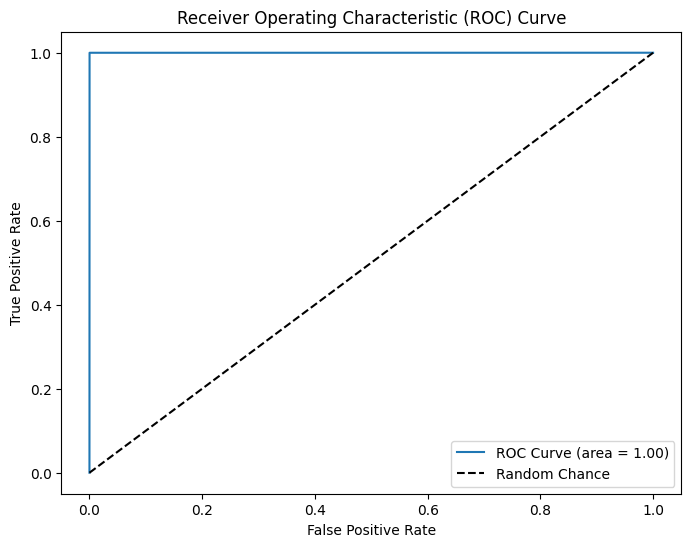

In [1]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv(r"C:\Users\Arnav Dham\OneDrive\Desktop\SOP\Dataset\Syn-training.csv")

# Separate features and target
X = df.drop("Label", axis=1)
y = df["Label"]

# Encode the target labels from strings to integers
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train an initial model to get feature importance
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_clf.fit(X_train, y_train)

# Get feature importance scores
importance_scores = xgb_clf.get_booster().get_score(importance_type="weight")

# Filter features with importance >= 3
selected_features = [f for f, importance in importance_scores.items() if importance >= 3]

# Select only important features
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

print(f"Selected {len(selected_features)} features: {selected_features}")

# Retrain model with selected features
xgb_clf_selected = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_clf_selected.fit(X_train_selected, y_train)

# Predict on validation set
y_pred = xgb_clf_selected.predict(X_val_selected)
y_pred_proba = xgb_clf_selected.predict_proba(X_val_selected)[:, 1]

# Evaluate performance
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

roc_auc = roc_auc_score(y_val, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [8]:
import joblib

# Save the trained best model
joblib.dump(best_model, "xgboost_ddos_model.pkl")
print("Model saved successfully as 'xgboost_ddos_model.pkl'")


Model saved successfully as 'xgboost_ddos_model.pkl'
